### Neural Network

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

2023-05-24 16:11:37.430540: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
#DATASET
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into testing and training


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images[0,23,23]  # let's have a look at one pixel

194

In [5]:
train_labels[:10]  # let's have a look at the first 10 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

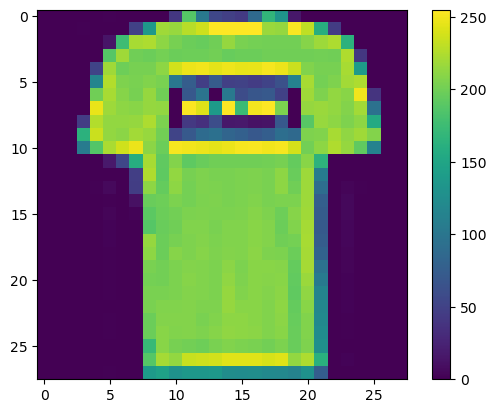

In [7]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
#DATA PREPROCESSING
#scale all our greyscale pixel values (0-255) to be between 0 and 1
train_images = train_images / 255.0

test_images = test_images / 255.0

In [9]:
#BUILDING THE MODEL
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    tf.keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    tf.keras.layers.Dense(10, activation='softmax') # output layer (3)
])

2023-05-24 16:12:01.431615: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
#COMPILE MODEL
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.fit(train_images, train_labels, epochs=2)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/2
1875/1875 [==============================] - 2s 963us/step - loss: 0.4987 - accuracy: 0.8256
Epoch 2/2
1875/1875 [==============================] - 2s 937us/step - loss: 0.3732 - accuracy: 0.8654


In [12]:
#EVALUATING MODEL
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 740us/step - loss: 0.4229 - accuracy: 0.8501
Test accuracy: 0.8500999808311462


In [13]:
#MAKING PREDICTIONS
predictions = model.predict(test_images)
predictions[0]

313/313 [==============================] - 0s 588us/step


array([1.8416136e-05, 7.2052870e-07, 1.7876702e-05, 6.4462520e-06,
       1.5287445e-05, 5.6896037e-01, 9.4028357e-05, 1.8079351e-01,
       5.9640745e-04, 2.4949694e-01], dtype=float32)

In [14]:
np.argmax(predictions[0])

5

In [15]:
test_labels[0]

9

1/1 [==============================] - 0s 25ms/step


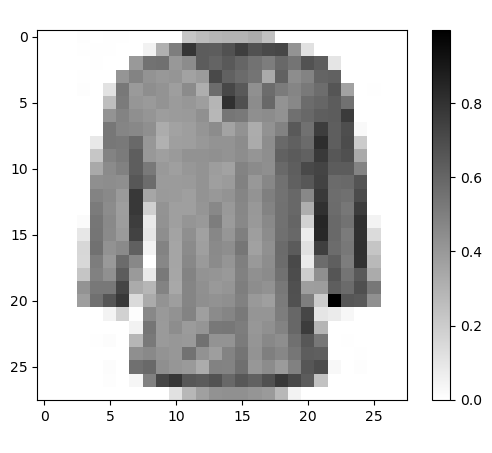

In [20]:
#VERIFYING PREDICTIONS
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    prediction = model.predict(np.array([image]))
    predicted_class = class_names[np.argmax(prediction)]

    show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title("Excpected: " + label)
    plt.xlabel("Guess: " + guess)
    plt.colorbar()
    plt.grid(False)
    plt.show()


def get_number():
    while True:
        num = input("Pick a number: ")
        if num.isdigit():
            num = int(num)
        if 0 <= num <= 1000:
            return int(num)
    else:
        print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
